### Getting started

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split 

import tensorflow as tf

In [8]:
data = pd.read_csv('../input/adult-census-income/adult.csv')

In [9]:
data 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Preprocessing 

In [10]:
# checking missing values 

data.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
# we can see there are ? present in the dataset instead of Nan, checking for that:

data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
# missing values are present in columns which are object type , ie no numerical data 

In [14]:
# checking for norminal features ?

data['workclass'].unique() # no order to values 

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
data['occupation'].unique() # no order to values 

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [16]:
data['native.country'].unique() # no order to values 

# we dont ave to worry about imputing missing values 

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [17]:
data = data.replace('?' , np.NaN)

In [18]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [19]:
data.loc[: , ['education' , 'education.num']].value_counts()

education     education.num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5355
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
dtype: int64

In [20]:
data.drop('education' , axis = 1 , inplace = True) # education already encoded

In [25]:
# encoding 

categorical_features = ['workclass'  ,'marital.status' , 'relationship' , 'race' ,'sex' ,'native.country' , 'occupation']


In [26]:
def get_unique(df , columns):
    categorical_uniques = {}
    for column in  columns:
        categorical_uniques[column] = list(df[column].unique())
    return categorical_uniques
        

In [27]:
get_unique(data , categorical_features)

{'workclass': [nan,
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'sex': ['Female', 'Male'],
 'native.country': ['United-States',
  nan,
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  'South',
  'Holand-Netherlands',
  'Puerto-Rico',
  'Poland',
  'Iran',
  'England',
  'Germany',
  'Italy',
  'Japan',
  'Hong',
  'Honduras',
  'Cuba',
  'Ireland',
  'Cambodia',
  'Peru',
  'Nicaragua',
  'Dominican-Republic',
  'Haiti',
  'El-Salvador',
  'Hungary',
  'Columbia',
  'Guatemal

In [28]:
binary_features = ['sex']
nominal_features = ['workclass'  ,'marital.status' , 'relationship' , 'race' ,'native.country' , 'occupation']
ordinal_features = [] # already droped education so no features here 

In [29]:
def binary_encode(df , columns  ):
    df = df.copy()
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

def one_hot_encode(df , columns ):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df , dummies] , axis = 1)
        df.drop(column , axis = 1 , inplace = True)
    return df

In [30]:
data = binary_encode(data , binary_features)
data = one_hot_encode(data , nominal_features)

In [31]:
data

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,90,77053,9,0,0,4356,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82,132870,9,0,0,4356,18,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66,186061,10,0,0,4356,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,140359,4,0,0,3900,40,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
32558,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
32559,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
(data.dtypes == 'object').sum()

1

In [33]:
# defininf X and y 

y = data['income']
X = data.drop('income' , axis = 1)

In [34]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [35]:
y_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [36]:
y_mapping , y

({0: '<=50K', 1: '>50K'}, array([0, 0, 0, ..., 1, 0, 0]))

In [37]:
# scaling the data 

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
X

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# splitting the data 


X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.80)

In [39]:
# building model 

inputs = tf.keras.Input(shape = (88,))

x = tf.keras.layers.Dense(16 , activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16 , activation = 'relu')(x)

outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)

model = tf.keras.Model(inputs = inputs , outputs = outputs)

2022-11-19 14:51:11.185639: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
# compile the model 

model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
             metrics = [tf.keras.metrics.BinaryAccuracy(name = 'acc') , tf.keras.metrics.AUC(name = 'auc')])

In [41]:
# fitting the model 

batch_size = 32 
epochs = 100

history = model.fit(X_train , y_train , validation_split = 0.20 , epochs = epochs , batch_size = batch_size)

2022-11-19 14:51:21.819178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
652/652 [==============================] - 3s 3ms/step - loss: 0.4201 - acc: 0.7952 - auc: 0.8225 - val_loss: 0.3754 - val_acc: 0.8242 - val_auc: 0.8697
Epoch 2/100
652/652 [==============================] - 2s 3ms/step - loss: 0.3526 - acc: 0.8365 - auc: 0.8833 - val_loss: 0.3516 - val_acc: 0.8319 - val_auc: 0.8871
Epoch 3/100
652/652 [==============================] - 2s 3ms/step - loss: 0.3345 - acc: 0.8432 - auc: 0.8962 - val_loss: 0.3393 - val_acc: 0.8426 - val_auc: 0.8952
Epoch 4/100
652/652 [==============================] - 2s 3ms/step - loss: 0.3245 - acc: 0.8485 - auc: 0.9027 - val_loss: 0.3334 - val_acc: 0.8415 - val_auc: 0.8994
Epoch 5/100
652/652 [==============================] - 2s 3ms/step - loss: 0.3188 - acc: 0.8507 - auc: 0.9061 - val_loss: 0.3279 - val_acc: 0.8436 - val_auc: 0.9019
Epoch 6/100
652/652 [==============================] - 2s 3ms/step - loss: 0.3169 - acc: 0.8504 - auc: 0.9071 - val_loss: 0.3260 - val_acc: 0.8476 - val_auc: 0.9033
Epoch 7/10

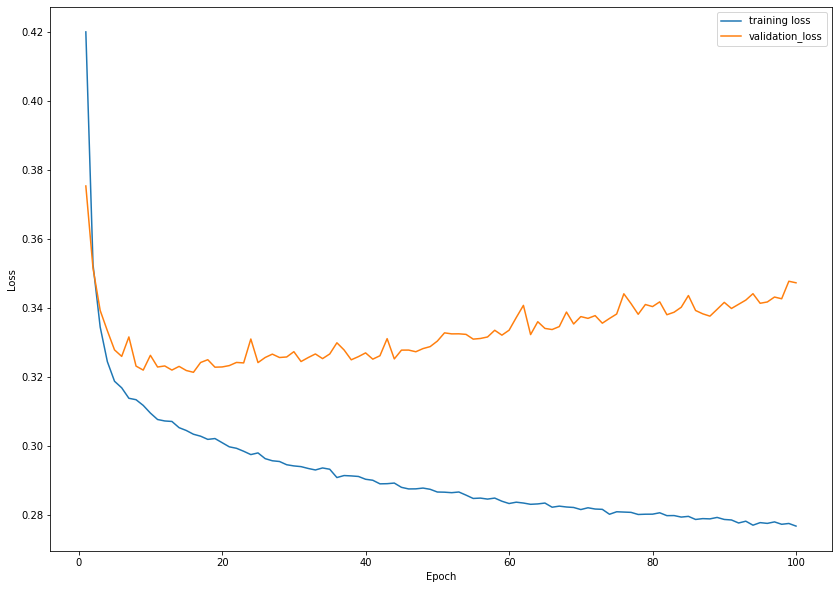

In [42]:
# results 

plt.figure(figsize = (14 , 10))

epochs_range = range(1 , epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range , train_loss , label = 'training loss')
plt.plot(epochs_range , val_loss , label ='validation_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
np.argmin(val_loss)

15

In [46]:
# building model 

inputs = tf.keras.Input(shape = (88,))

x = tf.keras.layers.Dense(16 , activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16 , activation = 'relu')(x)

outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)

model2 = tf.keras.Model(inputs = inputs , outputs = outputs)

# fitting the model with min val_loss
model2.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
             metrics = [tf.keras.metrics.BinaryAccuracy(name = 'acc') , tf.keras.metrics.AUC(name = 'auc')])

batch_size = 32 
epochs = 15

history2 = model2.fit(X_train , y_train , validation_split = 0.20 , epochs = epochs , batch_size = batch_size)

Epoch 1/15
652/652 [==============================] - 2s 3ms/step - loss: 0.4142 - acc: 0.8046 - auc: 0.8255 - val_loss: 0.3730 - val_acc: 0.8215 - val_auc: 0.8724
Epoch 2/15
652/652 [==============================] - 1s 2ms/step - loss: 0.3487 - acc: 0.8359 - auc: 0.8859 - val_loss: 0.3477 - val_acc: 0.8355 - val_auc: 0.8900
Epoch 3/15
652/652 [==============================] - 2s 3ms/step - loss: 0.3311 - acc: 0.8445 - auc: 0.8982 - val_loss: 0.3354 - val_acc: 0.8430 - val_auc: 0.8978
Epoch 4/15
652/652 [==============================] - 1s 2ms/step - loss: 0.3230 - acc: 0.8478 - auc: 0.9034 - val_loss: 0.3367 - val_acc: 0.8415 - val_auc: 0.9011
Epoch 5/15
652/652 [==============================] - 2s 2ms/step - loss: 0.3193 - acc: 0.8496 - auc: 0.9057 - val_loss: 0.3255 - val_acc: 0.8474 - val_auc: 0.9044
Epoch 6/15
652/652 [==============================] - 2s 2ms/step - loss: 0.3156 - acc: 0.8532 - auc: 0.9081 - val_loss: 0.3229 - val_acc: 0.8526 - val_auc: 0.9048
Epoch 7/15
652/6

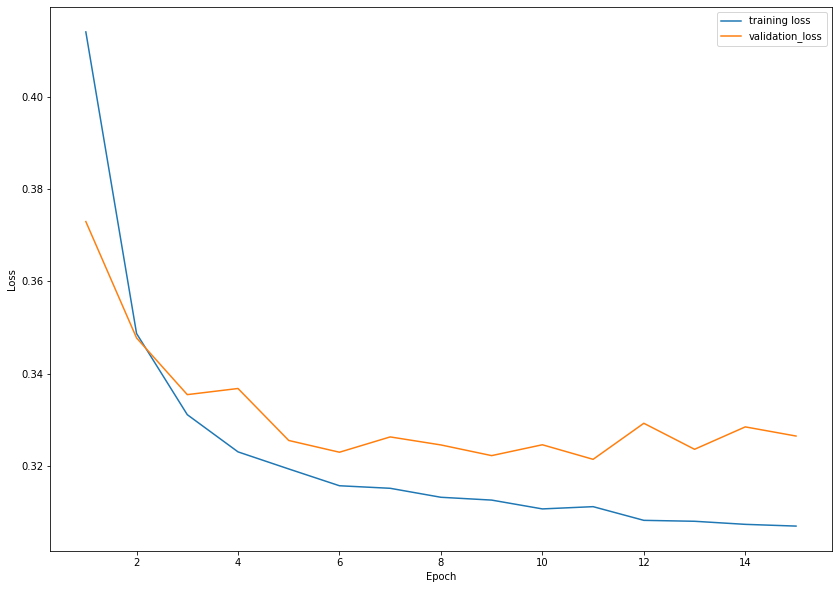

In [48]:
# results 

plt.figure(figsize = (14 , 10))

epochs_range = range(1 , epochs+1)
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.plot(epochs_range , train_loss , label = 'training loss')
plt.plot(epochs_range , val_loss , label ='validation_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
# evaluate

print(model.evaluate(X_test , y_test))
print(model2.evaluate(X_test , y_test))

204/204 [==============================] - 0s 2ms/step - loss: 0.3406 - acc: 0.8491 - auc: 0.9034
[0.34062984585762024, 0.8490710854530334, 0.903403639793396]
204/204 [==============================] - 0s 2ms/step - loss: 0.3221 - acc: 0.8494 - auc: 0.9081
[0.3221183717250824, 0.8493781685829163, 0.9080649614334106]


In [52]:
(y.sum()/len(y))*100

24.080955744602438